# Práctica de circuitos cuánticos
Elaborado por Ximena Toledo Rivera

Se muestra la multiplicación de dos números complejos. El vector verde representa $c_1\cdot c_2$.

In [19]:
%run python_functions/complex_number_multiplication.py

Output(layout=Layout(height='610px'))

# Exponencial compleja como rotación
*Complex Exponential As Rotation.* Un circulo de radio $\rho$ 
puede ser parametrizado por una sola variable $\theta$ como $(x,y)=(\rho\cos\theta,\rho\sin\theta)$ donde $\theta$ están en el intervalo $[0,2\pi)$. En el plano complejo, la parte real $\rho\cos\theta$ y la parte imaginaria $i\rho\sin\theta$ se puede trazar durante el mismo intervalo para theta, dando un círculo de radio $\rho$ en el plano complejo.


In [2]:
%run python_functions/complex_number_rotation.py

Output(layout=Layout(height='610px'))

## Experimentando con la esfera de Bloch

In [ ]:
%run python_functions/bloch_sphere_measurement.py

: 

# Creación de circuito cuántico

Inicializamos un qubit en eñ estadp |0> y aplicamos una compuerta de Hadamard. Qiskit contiene la clase QuantumCircuit que permite construir circuitos cuánticos, en este paso, importamos la clase.

In [4]:
from qiskit import QuantumCircuit

La clase se inicializa al especificar un número de qubits en el circuito, al medir el circuito cuántico, necesitaremos de un bit clásico para almacenar la salida de cada qubit.

In [5]:
myCirc = QuantumCircuit(1,1)

El primer argumento **1** de la clase, especifica que se usará sólo un qubit, el segundo argumento especifica que almacenamos un bit clásico de salida para futuras mediciones.

In [6]:
myCirc.h(0);

Ahora, se agrega una compuerta de hadamard con la función **h** de la clase.

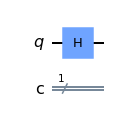

In [ ]:
myCirc.draw(output='mpl')

myCirc es el nombre del circuito que se creó, se inserto una compuerta Hadamard con **.h(0)**, el argumento **0** especifica que se desea aplicar la compuerta al qubit 0. La numeración en Python comienza en cero.

Se dibuja el circuito con la función **draw**

In [8]:
myCirc.measure(0,0);

Para correr el circuito y medirlo su salida se hará uso de m+odulos adicionales de Qiskit **(Aer y Execute)**, primero agregamos la operación de medición al circuito creado.

EL primer aargumento especifica la medición del primer qubit (se debe recordar que Python empieza a contar desde 0), el segundo argumento especifica que se guardo la salida de la medición en el primer bit de salida.

In [9]:
# Importando Aer y execute
from qiskit import Aer, execute

El módulo Aer contiene simuladores y se usará si se desea correr el circuto cuántico en una computadora cántica. La acción es especificada agregando **'qsam_simulator'** con el nombre de la computadora cuántica.

In [10]:
backend_sim = Aer.get_backend('qasm_simulator')

Shots especifica cuántas veces el circuito cuántico se ejecuta y esos resultado se almacenan en **sim**.

In [13]:
sim = execute(myCirc, backend_sim, shots=1000)

Los resultados pueden obtenerse haciendo uso de la función **result**.

In [14]:
sim_result = sim.result()

Desde el objeto de resultado podemos obtener el conteo de los 0 y 1 del circuito.

In [16]:
counts = sim_result.get_counts(myCirc)
print(counts)

{'0': 490, '1': 510}


# Segundo circuito

Para la creación de un Bell Pair se aplica un Hadamard al primer qubit y luego se especifica un CNOT al primer qubit y al segundo qubit.

In [21]:
from qiskit import QuantumCircuit, Aer, execute

myCirc=QuantumCircuit(2,2)
myCirc.h(0)
myCirc.cx(0,1)
myCirc.measure([0,1],[1,0])

backend_sim=Aer.get_backend('qasm_simulator')
sim=execute(myCirc,backend_sim, shots=1000)
sim_result=sim.result()
counts=sim_result.get_counts(myCirc)
print(counts)

{'11': 515, '00': 485}


El primer argumento es una lista de qubits para medir. El segundo argumento es una lista de bits clásicos para almacenar las medidas. Estas listas deben tener la misma longitud.

# Visualización

Para que los resultados tengan el sentido esperado, el etiquetado inverso es el camino a seguir.

In [24]:
from qiskit import QuantumCircuit, Aer, execute

circ=QuantumCircuit(2,2)
circ.x(0)
circ.measure([0,1],[0,1])

backend_sim=Aer.get_backend('qasm_simulator')
sim=execute(circ,backend_sim, shots=1000)
sim_result=sim.result()
counts=sim_result.get_counts(circ)
print(counts)

{'01': 1000}


Se crea un circuito con dos qubits y aplicamos una puerta 𝑋 al primer qubit. Esperamos que la salida del circuito sea |10>. Dado que no invirtió la lista de bits clásicos, la salida muestra el estado |01>.

Para visualizar la salida de las compuertas se puede usar un histograma.

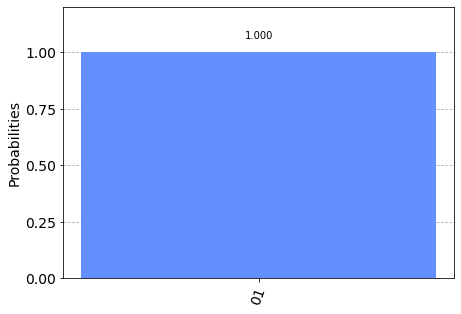

In [25]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

### Usando statevector_simulator
Este simulador ejecuta un circuito de la misma manera que lo hace qasm_simulator, pero en su lugar realiza un seguimiento de los estados.

In [26]:
from qiskit.visualization import plot_state_city

#creando circuito sin medición
statevector_circ=QuantumCircuit(3)
statevector_circ.h(0)
statevector_circ.cx(0,1)
statevector_circ.cx(1,2) 

backend_sim = Aer.get_backend('statevector_simulator')
result = execute(statevector_circ, backend_sim).result()
statevector = result.get_statevector(statevector_circ)   # se obtiene un vector de estado
print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


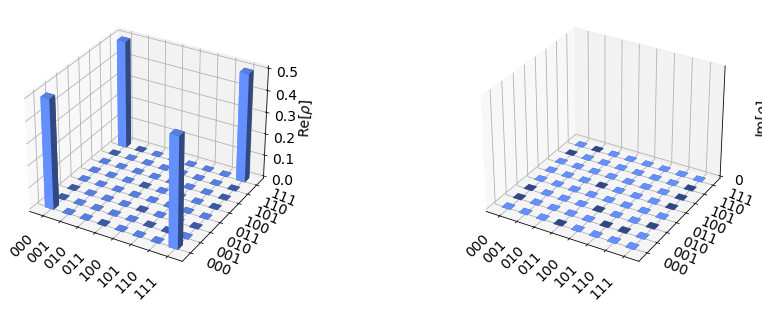

In [27]:
plot_state_city(statevector)

Se muestra el caso cuando se aplica un Hadamard a los primeros 2 qubits.

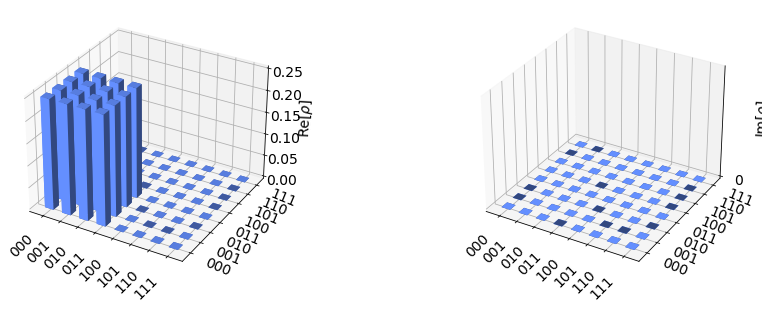

In [29]:
#Creando circuito sinmedición
statevector_circ=QuantumCircuit(3)

n=2
[statevector_circ.h(i) for i in range(n)]

backend_sim = Aer.get_backend('statevector_simulator')
result = execute(statevector_circ, backend_sim).result()
statevector = result.get_statevector(statevector_circ)                 

plot_state_city(statevector)

# Simulación de rudio

También es posible usar un simludor que modela el ruido y la decoherencia reales medidos en hardware real. En este caso se realiza un prueba de backend por FakeVigo. 

In [30]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeVigo

backend_sim = Aer.get_backend('qasm_simulator')
backend_device = FakeVigo()
#provider = IBMQ.load_account()
#device_backend = provider.get_backend('ibmq_vigo')

noise_model=NoiseModel.from_backend(backend_device) #creates a generic noise model
coupling_map=backend_device.configuration().coupling_map

sim = execute(circ, backend_sim, 
              noise_model=noise_model,
              basis_gates=noise_model.basis_gates,
              coupling_map=coupling_map)
sim_result = sim.result()
counts_noise = sim_result.get_counts(circ)
print(counts_noise)

{'11': 7, '10': 1, '00': 80, '01': 936}


/tmp/ipykernel_14320/1407383180.py:2: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeVigo


Los errores pueden no ser drásticos para los cortocircuitos, pero los más largos pueden tener dificultades para producir resultados significativos. 

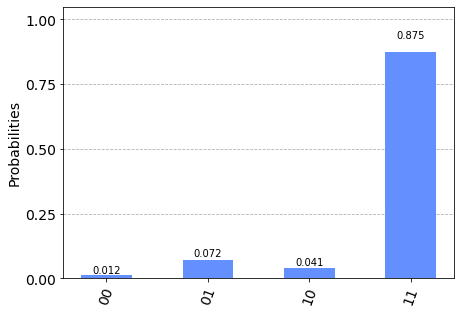

In [33]:
circ=QuantumCircuit(2,2)

n=5

for _ in range(n):
    circ.cx(0,1)
    circ.x(1)
    circ.x(0)

circ.measure([0,1],[1,0])
    
sim = execute(circ, backend_sim, 
              noise_model=noise_model,
              basis_gates=noise_model.basis_gates,
              coupling_map=coupling_map)
sim_result = sim.result()
counts_noise = sim_result.get_counts(circ)
plot_histogram(counts_noise)

Se crea un ciclo que agrega una puerta CNOT entre dos qubits, seguida de una puerta 𝑋 en cada uno de los qubits. Actualmente, el bucle está configurado para ejecutarse 𝑛 veces, donde 𝑛=5 . 